# K-평균 군집
### 군집
- 데이터를 여러 개의 군집으로 묶는 분석방법
- 유사한 개채들을 군집으로 그룹화하여 각 집단의 성격을 파악
- 같은 군집에 속하는 데이터는 다른 군집에 속하는 데이터들보다 유사성이 높음

- 장점:
  - 일반적 군집에서 가장 많이 활용되는 알고리즘
  - 추가적인 분석을 위해 사용할 수 있음
  - 분석의 용이
- 단점:
  - 자료 유형이 혼합(수치,범주)된 경우 거리 정의 등이 어려울 수 있음
  - 초기 군집 수 설정이 중요
  - 결과해석의 모호(좋은 군집을 형성했다는 보편적 기준이 애매함)


- 주어진 데이터를 k개의 군집으로 묶는 알고리즘으로, means는 각 데이터로부터 그 데이터가 속한 클러스터의 중심까지의 평균 거리이고
- 이값을 최소화 하는것이 알고리즘의 목표
- 데이터가 연속형일 때 사용한다.( 명목형 데이터는 직선 거리를 구할 수 없기 때문)
- 군집 수행 과정
    1. k개의 임의의 중심점(centroid)을 배치, 각 데이터들에 대해 중심과정과의 거리 계산(유클리드 거리)
    2. 모든 데이터를 가장 가까운 군집 중심에 할당
    3. 각 군집에 포함된 데이터들의 평균값으로 새로운 군집 중심을 재설정
    4. 군집 중심의 변화가 거의 없을 때까지 2번과 3번을 반복

- KMeans 클래스 생성자 주요속성
  
|파라미터 명|설명|
|------|---|
|n_clusters|군집화 개수(군집 중심점의 개수)|
|init|초기에 군집 중심점의 좌표를 설정할 방식(k-means++,random)|
|max_iter|최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.|
|random_state|중심 초기화를 위한 난수 생성 seed값|

- KMeans 군집화 수행 완료 후 주요 속성

|파라미터 명|설명|
|------|---|
|labels|각데이터가 속한 군집 중심점 레이블(클러스터 번호)|
|cluster_centers|각 군집 중심점 좌표|

- 최적의 K?
    - K값을 늘려가면서 최적의 군집을 찾는방법, 어떤 K가 적절한지에 대한 명확한 답은 없다
    - K값에 따른 군집내 응집도(각 데이터에서 할당된 클러스터의 중심까지의 제곱 거리 합계)를 보고 최적의
    - K를 선택하는 방법, 군집의 수에 따라 응집도가 완만하게 줄어드는 곳을 기점으로 군집의 수를 정한다.

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:,2:] # 꽃잎의 길이(petal length)와 꽃잎의 넓이(petal width)
y = iris.target

## 최적의 K 찾기
- KMeans 클래스의 inhertia 속성 이용
    - 각 데이터에서 할당된 클러스터의 중심까지의 제곱 거리 합계

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

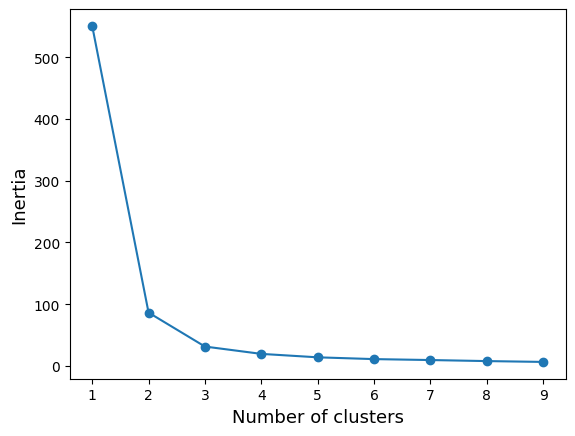

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

intertia_arr=[]
for k in range(1,10):
  kemans = KMeans(n_clusters=k)
  kemans.fit(X)
  intertia= kemans.inertia_
  intertia_arr.append(intertia)
  
plt.style.use('default')
plt.plot(range(1,10),intertia_arr,marker='o')
plt.xlabel('Number of clusters',fontsize=13)
plt.ylabel('Inertia',fontsize=13)
plt.show()

# 3. K-Means Clustering 하기

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.labels_
print(y_pred)
np.unique(y_pred,return_counts=True)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([48, 50, 52]))

Text(0.5, 1.0, 'Pred')

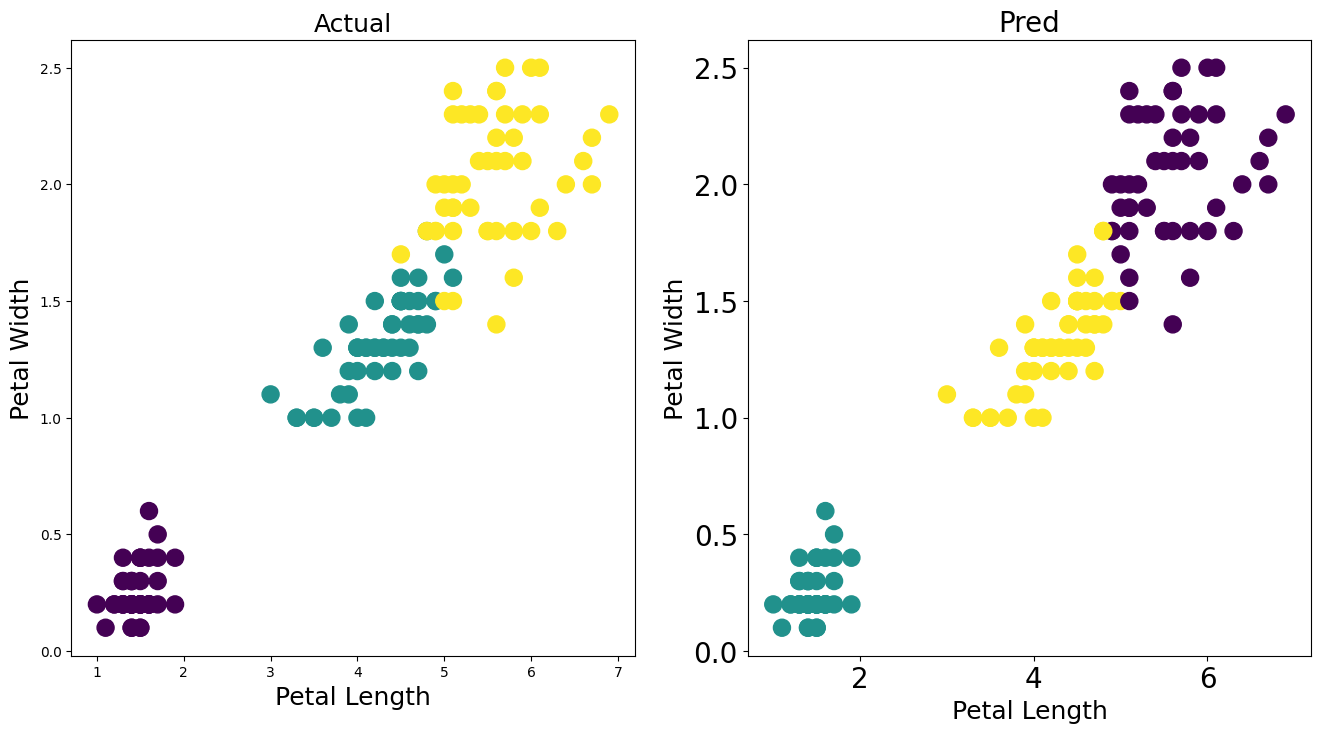

In [24]:
fig, axes = plt.subplots(1,2,figsize=(16,8))

axes[0].scatter(X[:,0],X[:,1], c=y, s=150)
axes[0].set_xlabel('Petal Length',fontsize = 18)
axes[0].set_ylabel('Petal Width', fontsize = 18)
axes[0].tick_params
axes[0].set_title('Actual',fontsize=18)

axes[1].scatter(X[:,0],X[:,1], c=y_pred, s=150)
axes[1].set_xlabel('Petal Length',fontsize = 18)
axes[1].set_ylabel('Petal Width', fontsize = 18)
axes[1].tick_params(labelsize = 20)
axes[1].set_title('Pred',fontsize=20)

# 군집 평가
- 군집의 대상이 되는 데이터는 타깃 레이블을 가지고 있지 않는 것이 일반적이다. 따라서 분류와 유사해 보일수 있으나 분류 값 데이터(라벨)을 가지고 있지 않기 때문에
- 데이터 내에 숨어 있는 특성을 통해 동일한 분류로 구분하는데 있어 그 차이가 있다.
- 군집은 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 측정하기 어렵다.
- 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석이라는 것을 이용한다.

## 실루엣 분석(Silhousette Analysis)
- 실루엣 분석은 두군집 간의 거리가 얼마나 효율적으로 분리되어있는지를 나타낸다.
- 효율적 분리란 **다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐져 있다**는 것을 의미
- 실루엣 분석은 실루엣 계수를 기반으로 하며, 개별데이터가 가지는 군집화 지표이다.
    - s(o) : 데이터 포인트 o의 실루엣 계수
    - a(o) : o와 o가 속한 클러스터의 다른 모든 데이터 포인트 사이의 평균거리
    - b(o) : o에서부터 o가 속하지 않은 모든 군집중 가장 가까운 군집과의 평균거리
    - max(a(o),b(o)} : 두 군집 간의 거리 값(b(o) - a(o))을 정규화하기 위함

-  실루엣 계수는 [-1,1] 사이의 값을 갖고 1에 가까우면 잘분석되고, -1 가까우면 분석이 잘되지 못한 

# 4. 군집평가

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 대한 실루엣 계수산출
score_samples = silhouette_score(iris.data,kmeans.labels_)
iris_df['silhouette coef'] = score_samples

iris_df.head()

average_score = silhouette_score(iris.data, kmeans.labels_)
print(f'실루엣 개수:{average_score:.2f}')

group_by_cluster = iris_df.groupby('cluster')['silhouette coef'].mean()
print(group_by_cluster)

실루엣 개수:0.52
cluster
0    0.522172
1    0.522172
2    0.522172
Name: silhouette coef, dtype: float64


# 5. 실루엣 계수를 이용한 군집 개수 최적화

In [6]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    import numpy as np

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

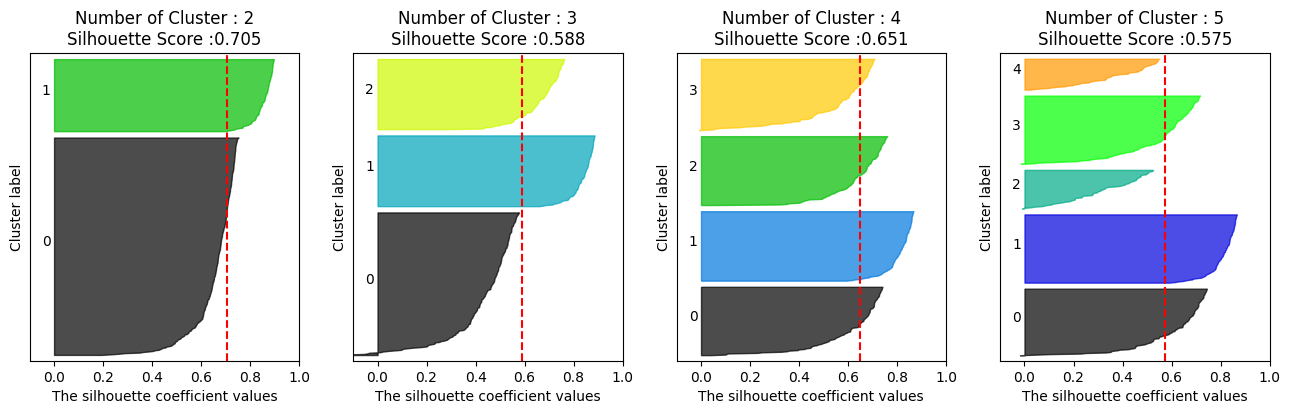

In [7]:
# # make_blobs: clustering을 위한 임의의 샘플 데이터를 생성
from sklearn.datasets import make_blobs
# 샘플500개 2차원 군집 중심점 4개
X, y = make_blobs(n_samples=500,n_features=2, centers =4, cluster_std=1, shuffle=True, random_state=1)

visualize_silhouette([2,3,4,5],X)

# 주성분 분석
- 주성분 분석(PCA)이란 변수가 가지고 있는 정보의 손실을 최소화 하면서 변수의 차원을 축소하는 분석 기법이다.
- 차원축소의 필요성
  - 설명 변수(feature)가 많으면 학습 속도가 느려진다.
  - 의미 없는 feature들로 인해서 과적합이 되거나 학습이 제데로 되지 않는다.
  - 차원을 축소하면 데이터를 시각화로 표현하기 쉽다.

  - PCA원리
    - 가장 높은 분산을 가지는 데이터의 축을 찾아 이축으로 차원을 축소한다.
    - 분산은 데이터 정보를 설명하는 중요한 통계량이다.
    - 주성분은 데이터의 분산이 가장 큰 방향을 뜻하는 벡터다.